In [1]:
# A brief about dataset

In [2]:
'''
Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow
This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the 
answers to your model and reduce its predictability. Read more about it here.

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.
'''

'\nPredict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow\nThis dataset contains daily weather observations from numerous Australian weather stations.\n\nThe target variable RainTomorrow means: Did it rain the next day? Yes or No.\n\nNote: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the \nanswers to your model and reduce its predictability. Read more about it here.\n\nThis dataset contains about 10 years of daily weather observations from numerous Australian weather stations.\n'

In [3]:
# importing all necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer

In [5]:
# Loding dataset

In [6]:
aus=pd.read_csv("C://Users//acer//Desktop//1sem//python//aus rain//rain.csv")

In [7]:
# looking at the first few rows

In [8]:
aus.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


In [9]:
# looking at the last few rows

In [10]:
aus.tail(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [11]:
# looking at the columns data type

In [12]:
aus.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [13]:
# Lets drop RISK-MM column as directed by dataset provider

In [14]:
aus=aus.drop("RISK_MM",axis=1)

In [15]:
# data size

In [16]:
aus.shape

(142193, 23)

In [17]:
# lets look at the null values

In [18]:
aus.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [19]:
# Lets look at the unique values of all columns

In [20]:
for i in aus.columns:
    print(i, ": ",len(aus[i].unique()),"distinct labels")

Date :  3436 distinct labels
Location :  49 distinct labels
MinTemp :  390 distinct labels
MaxTemp :  506 distinct labels
Rainfall :  680 distinct labels
Evaporation :  357 distinct labels
Sunshine :  146 distinct labels
WindGustDir :  17 distinct labels
WindGustSpeed :  68 distinct labels
WindDir9am :  17 distinct labels
WindDir3pm :  17 distinct labels
WindSpeed9am :  44 distinct labels
WindSpeed3pm :  45 distinct labels
Humidity9am :  102 distinct labels
Humidity3pm :  102 distinct labels
Pressure9am :  547 distinct labels
Pressure3pm :  550 distinct labels
Cloud9am :  11 distinct labels
Cloud3pm :  11 distinct labels
Temp9am :  441 distinct labels
Temp3pm :  501 distinct labels
RainToday :  3 distinct labels
RainTomorrow :  2 distinct labels


In [21]:
for i in aus.columns:
    print(i,":",aus[i].unique())

Date : ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location : ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
MinTemp : [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  9.8 14.1
 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3  9.6
 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6 19.3
 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5 28.3
 18.4 12.4 13.3 18.  1

Humidity9am : [ 71.  44.  38.  45.  82.  55.  49.  48.  42.  58.  89.  76.  65.  50.
  69.  80.  47.  56.  54.  41.  78.  46.  43.  33.  34.  36.  52.  51.
  40.  35.  39.  60.  37.  27.  32.  53.  20.  66.  63.  57.  62.  87.
  61.  59.  92.  72.  67.  75.  88.  68.  73.  74.  83.  77.  70.  81.
  86.  97.  99.  91.  85.  93.  84.  94.  79.  98.  96.  95.  90.  64.
  29.  21. 100.  24.  nan  25.  31.  18.  23.  26.  28.  30.  19.  22.
  17.  15.   9.  12.  13.  16.   6.  10.  14.  11.   7.   8.   5.   3.
   2.   4.   0.   1.]
Humidity3pm : [ 22.  25.  30.  16.  33.  23.  19.   9.  27.  91.  93.  43.  28.  82.
  65.  32.  26.  24.  17.  15.  70.  12.   8.  31.  20.  10.  21.  39.
  13.  11.  69.  18.  14.  35.  90.  68.  74.  41.  34.  78.  49.  37.
  42.  47.  52.  29.  86.  89.  62.  79.  48.  46.  38.  44.  51.  36.
  45.  40.  53.  61.  59.  63.  54.  57.  50.  58.  75.  97.  80.  95.
  56.  72.  60.  71.  73.  81.  76.  64.  87.  85.  67.  55.  77.  84.
   7.  99.  92.  66.  83.  

In [22]:
# Feature engineering: Lets take one column at a time

In [23]:
# Lets take date column

In [24]:
aus.Date.dtype

dtype('O')

In [25]:
# as it is object data type we need to convert it to datatime dataframe

In [26]:
aus["Date"]=pd.to_datetime(aus.Date)

In [27]:
aus.Date.dtype

dtype('<M8[ns]')

In [28]:
# lets extract all useful info 

In [29]:
aus["date_day"]=aus.Date.dt.day

In [30]:
aus["date_month"]=aus.Date.dt.month

In [31]:
aus["date_year"]=aus.Date.dt.year

In [32]:
# Lets drop Date column

In [33]:
aus.drop("Date",axis=1,inplace=True)

In [34]:
# Location column

In [35]:
len(aus.Location.unique())

49

In [36]:
aus.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [37]:
# as we have many different labels under this categorical col we can perform Labelencoder technique

In [38]:
le=LabelEncoder()
loc=le.fit_transform(aus["Location"])

In [39]:
loc_df=pd.DataFrame(loc,columns=["location"])

In [40]:
pd.DataFrame({"act":aus.Location.unique(),"pred":loc_df.location.unique()})

,act,pred
0,Albury,2
1,BadgerysCreek,4
2,Cobar,10
3,CoffsHarbour,11
4,Moree,21
5,Newcastle,24
6,NorahHead,26
7,NorfolkIsland,27
8,Penrith,30
9,Richmond,34


In [41]:
# now we can cancat loc_df with our main dataset

In [42]:
aus=pd.concat([loc_df,aus],axis=1)

In [43]:
# removing original Location col from dataset

In [44]:
aus.drop("Location",axis=1,inplace=True)

In [45]:
# Min temp: no need to encode as it is numeric,lets look at the null values

In [46]:
aus.MinTemp.isna().sum()

637

In [47]:
# lets fill all null values with mean of column itself

In [48]:
aus["MinTemp"].fillna(aus.MinTemp.mean(),inplace=True)

In [49]:
aus.MinTemp.isna().sum()

0

In [50]:
# MaxTemp no need to encode as it is numeric,lets look at the null values

In [51]:
aus.MaxTemp.isna().sum()

322

In [52]:
aus.MaxTemp.fillna(aus.MaxTemp.mean(),inplace=True)

In [53]:
aus.MaxTemp.isna().sum()

0

In [54]:
# Rainfall: no need to encode as it is numeric,lets look at the null values

In [55]:
aus.Rainfall.isna().sum()

1406

In [56]:
aus.Rainfall.fillna(aus.Rainfall.mean(),inplace=True)

In [57]:
aus.Rainfall.isna().sum()

0

In [58]:
# Evaporation

In [59]:
aus.Evaporation.isna().sum()

60843

In [60]:
aus.Evaporation.fillna(aus.Evaporation.mean(),inplace=True)

In [61]:
aus.Evaporation.isna().sum()

0

In [62]:
# sunshine

In [63]:
aus.Sunshine.isna().sum()

67816

In [64]:
aus.Sunshine.fillna(aus.Sunshine.mean(),inplace=True)

In [65]:
aus.Sunshine.isna().sum()

0

In [66]:
# WindGustDir: as this is a categorical varibale we need to encode it by using Label encoder

In [67]:
aus.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [68]:
aus.WindGustDir.replace(np.nan,"Unknown",inplace=True)

In [69]:
aus.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'Unknown', 'E', 'SSW'], dtype=object)

In [70]:
le=LabelEncoder()
aus["windgustdir"]=le.fit_transform(aus["WindGustDir"])

In [71]:
aus.groupby(["windgustdir","WindGustDir"]).size()

windgustdir  WindGustDir
0            E              9071
1            ENE            7992
2            ESE            7305
3            N              9033
4            NE             7060
5            NNE            6433
6            NNW            6561
7            NW             8003
8            S              8949
9            SE             9309
10           SSE            8993
11           SSW            8610
12           SW             8797
13           Unknown        9330
14           W              9780
15           WNW            8066
16           WSW            8901
dtype: int64

In [72]:
aus.drop("WindGustDir",axis=1,inplace=True)

In [73]:
# WindGustSpeed

In [74]:
aus.WindGustSpeed.isna().sum()

9270

In [75]:
aus.WindGustSpeed.fillna(aus.WindGustSpeed.mean(),inplace=True)

In [76]:
aus.WindGustSpeed.isna().sum()

0

In [77]:
# WindDir9am

In [78]:
aus.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [79]:
aus.WindDir9am.replace(np.nan,"Unknown",inplace=True)

In [80]:
le=LabelEncoder()
aus["winddir9am"]=le.fit_transform(aus["WindDir9am"])

In [81]:
aus.drop("WindDir9am",axis=1,inplace=True)

In [82]:
# WindDir3pm

In [83]:
aus.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [84]:
aus.WindDir3pm.replace(np.nan,"Unknown",inplace=True)

In [85]:
le=LabelEncoder()
aus["winddir3pm"]=le.fit_transform(aus["WindDir3pm"])

In [86]:
aus.drop("WindDir3pm",axis=1,inplace=True)

In [87]:
# WindSpeed9am

In [88]:
aus.WindSpeed9am.isna().sum()

1348

In [89]:
aus.WindSpeed9am.fillna(aus.WindSpeed9am.mean(),inplace=True)

In [90]:
aus.WindSpeed9am.isna().sum()

0

In [91]:
# WindSpeed3pm

In [92]:
aus.WindSpeed3pm.isna().sum()

2630

In [93]:
aus.WindSpeed3pm.fillna(aus.WindSpeed3pm.mean(),inplace=True)

In [94]:
aus.WindSpeed3pm.isna().sum()

0

In [95]:
# Now we have got a better idea of varibles like whereever we are having numerical col we are imputing mean. There is a library
# in sklearn called simpleImputer which does this job for us. It can calculate basic stats value and automatically replaces null 
# values present in our dataset.

In [96]:
# Humidity9am

In [97]:
aus.Humidity9am.isna().sum()

1774

In [98]:
aus.Humidity9am.fillna(aus.Humidity9am.mean(),inplace=True)

In [99]:
aus.Humidity9am.isna().sum()

0

In [100]:
# Humidity3pm

In [101]:
aus.Humidity3pm.isna().sum()

3610

In [102]:
aus.Humidity3pm.fillna(aus.Humidity3pm.mean(),inplace=True)

In [103]:
aus.Humidity3pm.isna().sum()

0

In [104]:
# Pressure9am

In [105]:
aus.Pressure9am.isna().sum()

14014

In [106]:
aus.Pressure9am.fillna(aus.Pressure9am.mean(),inplace=True)

In [107]:
aus.Pressure9am.isna().sum()

0

In [108]:
# Pressure3pm 

In [109]:
aus.Pressure3pm.isna().sum()

13981

In [110]:
aus.Pressure3pm.fillna(aus.Pressure3pm.mean(),inplace=True)

In [111]:
aus.Pressure3pm.isna().sum()

0

In [112]:
# Cloud9am

In [113]:
aus.Cloud9am.isna().sum()

53657

In [114]:
aus.Cloud9am.fillna(aus.Cloud9am.mean(),inplace=True)

In [115]:
aus.Cloud9am.isna().sum()

0

In [116]:
# Cloud3pm

In [117]:
aus.Cloud3pm.isna().sum()

57094

In [118]:
aus.Cloud3pm.fillna(aus.Cloud3pm.mean(),inplace=True)

In [119]:
aus.Cloud3pm.isna().sum()

0

In [120]:
# Temp9am

In [121]:
aus.Temp9am.isna().sum()

904

In [122]:
aus.Temp9am.fillna(aus.Temp9am.mean(),inplace=True)

In [123]:
aus.Temp9am.isna().sum()

0

In [124]:
# Temp3pm

In [125]:
aus.Temp3pm.isna().sum()

2726

In [126]:
aus.Temp3pm.fillna(aus.Temp3pm.mean(),inplace=True)

In [127]:
aus.Temp3pm.isna().sum()

0

In [128]:
# RainToday

In [129]:
aus.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [130]:
aus["RainToday"].fillna("unknown",inplace=True)

In [131]:
le=LabelEncoder()
aus["raintoday"]=le.fit_transform(aus["RainToday"])

In [132]:
aus.drop("RainToday",axis=1,inplace=True)

In [133]:
aus.columns

Index(['location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'date_day', 'date_month',
       'date_year', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday'],
      dtype='object')

In [134]:
aus.dtypes

location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow      object
date_day           int64
date_month         int64
date_year          int64
windgustdir        int32
winddir9am         int32
winddir3pm         int32
raintoday          int32
dtype: object

In [135]:
# Data visualization

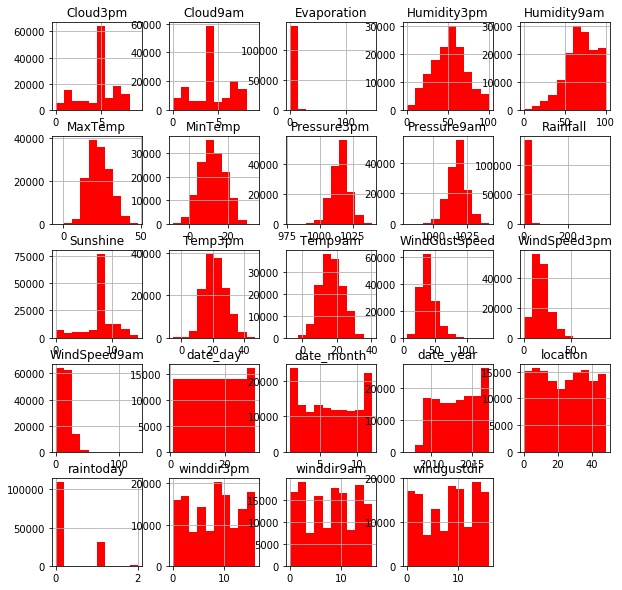

In [136]:
aus.hist(figsize=(10,10),color="red")
plt.show()

In [137]:
# using countplot

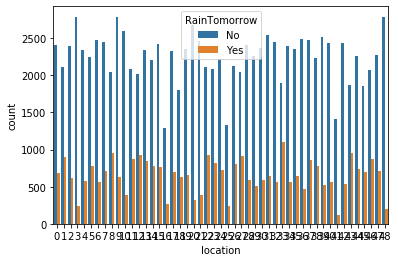

In [138]:
sns.countplot(x="location",hue="RainTomorrow",data=aus)

In [139]:
# using scatterplot

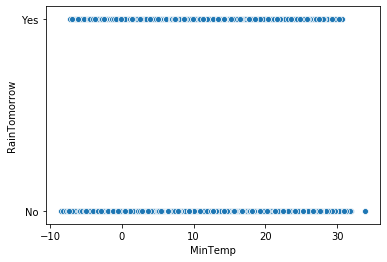

In [140]:
sns.scatterplot(x="MinTemp",y="RainTomorrow",data=aus)

In [141]:
# scattermatrix

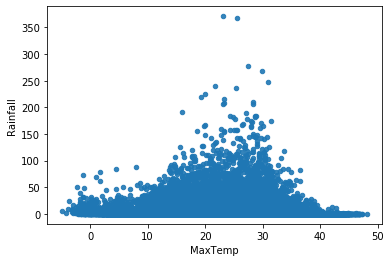

In [142]:
aus.plot(kind="scatter",x="MaxTemp",y="Rainfall",alpha=0.9)

In [143]:
# Barplot

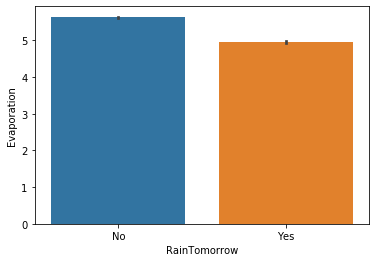

In [144]:
sns.barplot(y="Evaporation",x="RainTomorrow",data=aus)

In [145]:
# Boxplot

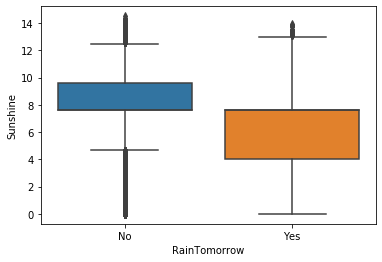

In [146]:
sns.boxplot(y="Sunshine",x="RainTomorrow",data=aus)

In [147]:
# Heat map

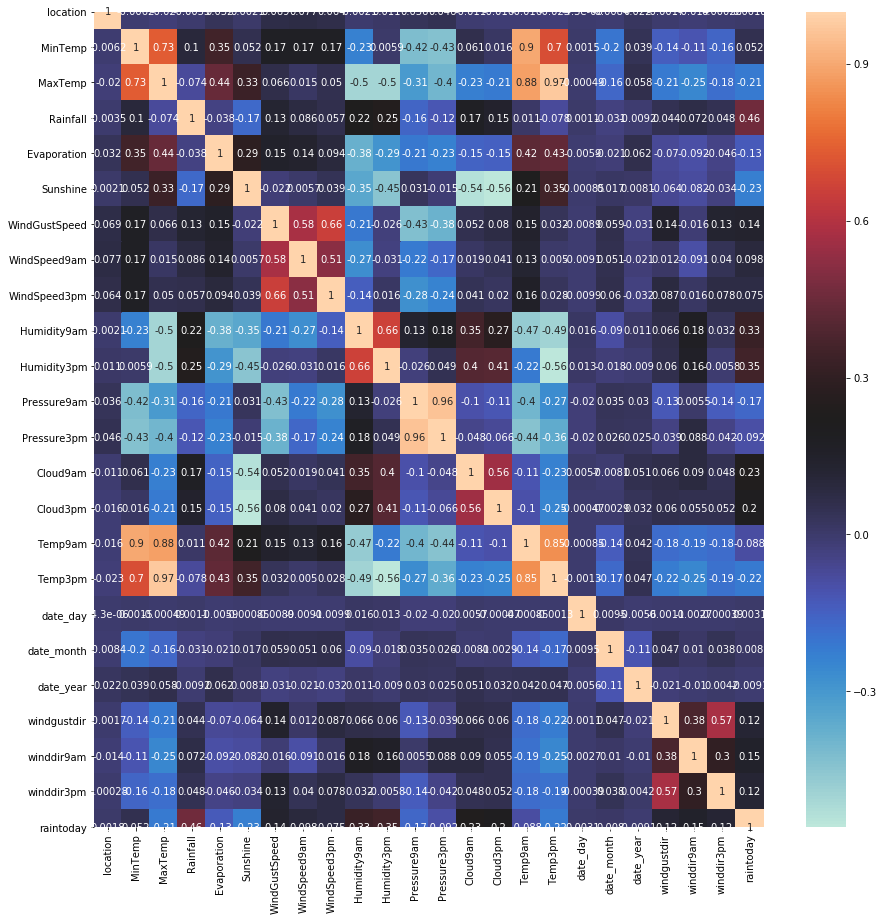

In [148]:
fig=plt.figure(figsize=(15,15))
aus_corr=aus.corr()
sns.heatmap(aus_corr,annot=True,cmap="icefire")

In [149]:
# detect outlier

In [150]:
outliers=[]
def detect_outliers(data):
    
    threshhold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        
        z_score=(i-mean)/std
        if np.abs(z_score)>threshhold:
            outliers.append(i)
            return outliers

In [151]:
detect_outliers(aus["Evaporation"])

[16.4]

In [152]:
# Lets encode target variable

In [153]:
le=LabelEncoder()
aus["target"]=le.fit_transform(aus["RainTomorrow"])

In [154]:
aus.drop("RainTomorrow",axis=1,inplace=True)

In [155]:
# Lets divide dataset into dependent and independent variable

In [156]:
y=aus["target"]
x=aus.drop("target",axis=1)

In [157]:
# Lets divide our dataset into training and test 

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [159]:
# Checking the shape of splitted set

In [160]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (99535, 24)
shape of y_train is: (99535,)
shape of x_test is: (42658, 24)
shape of y_test is: (42658,)


In [161]:
# applying ML algo

In [162]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [163]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

        Actual  Predicted
56320        1          1
124136       0          0
117063       0          0
6974         0          0
61546        1          1
...        ...        ...
11175        1          0
71105        0          0
131694       0          0
74179        1          1
119144       0          0

[42658 rows x 2 columns]


In [164]:
# Evaluating the model result

In [165]:
print("accuracy score is:",accuracy_score(y_test,prediction))
print(" Kappa is :",cohen_kappa_score(y_test, prediction))
print(" Sensitiviy is :",recall_score(y_test, prediction))
print(" Precision is :",precision_score(y_test,prediction))
print("R2 is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is :",auc(fpr,tpr))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test,prediction))

accuracy score is: 0.8413896572741338
 Kappa is : 0.48666090562943287
 Sensitiviy is : 0.4915485564304462
 Precision is : 0.7088569265707797
R2 is: 0.08545150686333525
Area under curve is : 0.7167548715813536
array([[31210,  1923],
       [ 4843,  4682]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.87      0.94      0.90     33133\n'
 '           1       0.71      0.49      0.58      9525\n'
 '\n'
 '    accuracy                           0.84     42658\n'
 '   macro avg       0.79      0.72      0.74     42658\n'
 'weighted avg       0.83      0.84      0.83     42658\n')


In [166]:
# decision tree

In [167]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [168]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

        Actual  Predicted
56320        1          1
124136       0          0
117063       0          0
6974         0          1
61546        1          0
...        ...        ...
11175        1          1
71105        0          0
131694       0          0
74179        1          1
119144       0          0

[42658 rows x 2 columns]


In [169]:
print("accuracy score is:",accuracy_score(y_test,prediction))
print(" Kappa is :",cohen_kappa_score(y_test, prediction))
print(" Sensitiviy is :",recall_score(y_test, prediction))
print(" Precision is :",precision_score(y_test,prediction))
print("R2 is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is :",auc(fpr,tpr))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test,prediction))

accuracy score is: 0.7897697969900136
 Kappa is : 0.39898587608354064
 Sensitiviy is : 0.5411023622047244
 Precision is : 0.5285611732130038
R2 is: -0.21218901661980638
Area under curve is : 0.7011792558314842
array([[28536,  4597],
       [ 4371,  5154]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.87      0.86      0.86     33133\n'
 '           1       0.53      0.54      0.53      9525\n'
 '\n'
 '    accuracy                           0.79     42658\n'
 '   macro avg       0.70      0.70      0.70     42658\n'
 'weighted avg       0.79      0.79      0.79     42658\n')


In [170]:
# random forest

In [171]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [172]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

        Actual  Predicted
56320        1          1
124136       0          0
117063       0          0
6974         0          0
61546        1          1
...        ...        ...
11175        1          0
71105        0          0
131694       0          0
74179        1          1
119144       0          0

[42658 rows x 2 columns]


In [173]:
print("accuracy score is:",accuracy_score(y_test,prediction))
print(" Kappa is :",cohen_kappa_score(y_test, prediction))
print(" Sensitiviy is :",recall_score(y_test, prediction))
print(" Precision is :",precision_score(y_test,prediction))
print("R2 is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is :",auc(fpr,tpr))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test,prediction))

accuracy score is: 0.8445778048666135
 Kappa is : 0.4853534924660683
 Sensitiviy is : 0.47044619422572176
 Precision is : 0.7385857919894512
R2 is: 0.10383439114748927
Area under curve is : 0.7112892547200802
array([[31547,  1586],
       [ 5044,  4481]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.86      0.95      0.90     33133\n'
 '           1       0.74      0.47      0.57      9525\n'
 '\n'
 '    accuracy                           0.84     42658\n'
 '   macro avg       0.80      0.71      0.74     42658\n'
 'weighted avg       0.83      0.84      0.83     42658\n')


In [174]:
# KNN

In [175]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [176]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

        Actual  Predicted
56320        1          1
124136       0          0
117063       0          0
6974         0          0
61546        1          1
...        ...        ...
11175        1          0
71105        0          0
131694       0          0
74179        1          1
119144       0          0

[42658 rows x 2 columns]


In [177]:
print("accuracy score is:",accuracy_score(y_test,prediction))
print(" Kappa is :",cohen_kappa_score(y_test, prediction))
print(" Sensitiviy is :",recall_score(y_test, prediction))
print(" Precision is :",precision_score(y_test,prediction))
print("R2 is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is :",auc(fpr,tpr))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test,prediction))

accuracy score is: 0.8397252566927658
 Kappa is : 0.48791809741717174
 Sensitiviy is : 0.5040419947506561
 Precision is : 0.6943881978594156
R2 is: 0.07585455992087242
Area under curve is : 0.7201343586767496
array([[31020,  2113],
       [ 4724,  4801]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.87      0.94      0.90     33133\n'
 '           1       0.69      0.50      0.58      9525\n'
 '\n'
 '    accuracy                           0.84     42658\n'
 '   macro avg       0.78      0.72      0.74     42658\n'
 'weighted avg       0.83      0.84      0.83     42658\n')


In [178]:
# naive Bayes

In [179]:
nb=GaussianNB()
nb.fit(x_train,y_train)
prediction=nb.predict(x_test)

In [180]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

        Actual  Predicted
56320        1          1
124136       0          0
117063       0          0
6974         0          0
61546        1          1
...        ...        ...
11175        1          1
71105        0          0
131694       0          0
74179        1          0
119144       0          0

[42658 rows x 2 columns]


In [181]:
print("accuracy score is:",accuracy_score(y_test,prediction))
print(" Kappa is :",cohen_kappa_score(y_test, prediction))
print(" Sensitiviy is :",recall_score(y_test, prediction))
print(" Precision is :",precision_score(y_test,prediction))
print("R2 is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is :",auc(fpr,tpr))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test,prediction))

accuracy score is: 0.8037648272305312
 Kappa is : 0.44995068781588143
 Sensitiviy is : 0.6006299212598425
 Precision is : 0.5560847589424572
R2 is: -0.1314935613430419
Area under curve is : 0.7313957562113658
array([[28566,  4567],
       [ 3804,  5721]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      0.86      0.87     33133\n'
 '           1       0.56      0.60      0.58      9525\n'
 '\n'
 '    accuracy                           0.80     42658\n'
 '   macro avg       0.72      0.73      0.72     42658\n'
 'weighted avg       0.81      0.80      0.81     42658\n')


In [ ]:
'''
Here we can say that by applying Random forest we get the best accuracy,so for final model we will be selecting this model.
Happy learning....

'''